# Loading & Accessing the data

In [10]:
# Loading data
import pandas as pd
import numpy as np

df = pd.read_csv(r'WDI.csv', encoding='utf-8', error_bad_lines=False, delimiter='\t')

df

C:\Users\Компьютер\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3524: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Year
0,2.00%,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",3.50%,$60,...,1,34.20%,61.90%,3.90%,31719449,59.90%,Africa,"$102,000,000","$193,000,000",1/12/2000
1,5.00%,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",3.40%,$22,...,1,47.60%,49.90%,2.50%,13924930,32.40%,Africa,"$34,000,000","$146,000,000",1/12/2000
2,4.30%,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",4.30%,$15,...,1,45.40%,51.70%,2.90%,6949366,38.30%,Africa,"$77,000,000","$50,000,000",1/12/2000
3,2.70%,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",4.70%,$152,...,1,38.30%,58.70%,2.90%,1755375,53.20%,Africa,"$227,000,000","$209,000,000",1/12/2000
4,4.60%,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",5.10%,$12,...,1,46.80%,50.50%,2.80%,11607944,17.80%,Africa,"$23,000,000","$30,000,000",1/12/2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,32427,91.10%,The Americas,NaN,NaN,1/12/2012
2700,1.30%,46.40%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",17.90%,"$8,895",...,1,19.60%,66.70%,13.60%,313873685,81.10%,The Americas,"$200,092,000,000","$126,573,000,000",1/12/2012
2701,1.50%,41.90%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",8.90%,"$1,308",...,1,22.00%,63.90%,14.00%,3395253,94.80%,The Americas,"$2,222,000,000","$1,028,000,000",1/12/2012
2702,2.00%,61.90%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",4.60%,$593,...,1,28.80%,65.20%,6.00%,29954782,88.90%,The Americas,"$904,000,000","$3,202,000,000",1/12/2012


From what we can see, there are a lot of problems with this file. 
- NaNs are present in profusion. 
- percent sign, dollar sign, commas in numerical columns


# Dealing with NaNs

Because I am cleaning this dataset for the future Tableau display, I don't particularly care about NaNs. They represent missing data, and Tableau can handle it just fine. Therefore, 
let's just see where are they at:

In [11]:
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Region                       0
Tourism Inbound            368
Tourism Outbound           471
Year                         0
dtype: int64

<AxesSubplot:>

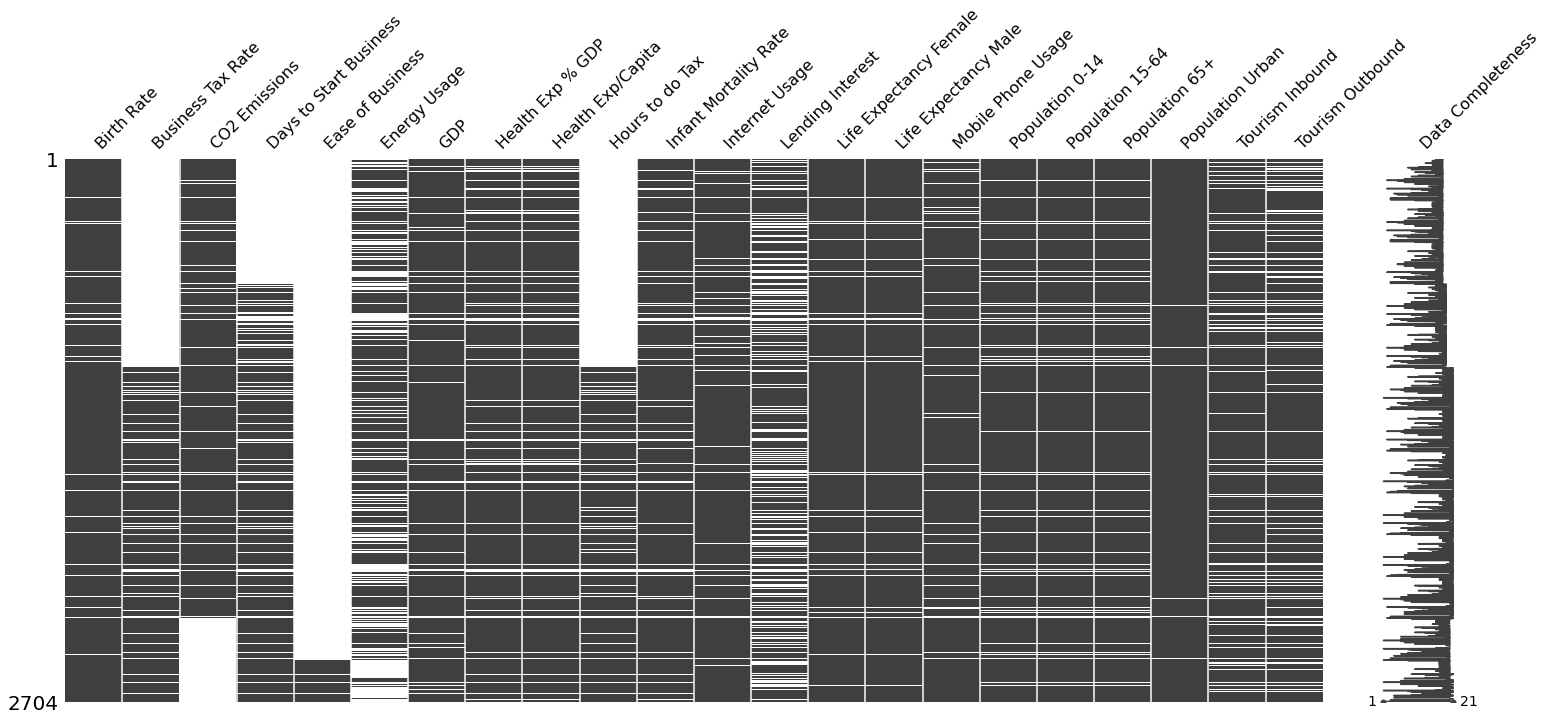

In [13]:
# Importing missingno, plotting missing data:
import missingno as msno

missing_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missing_df], labels=True)

<AxesSubplot:>

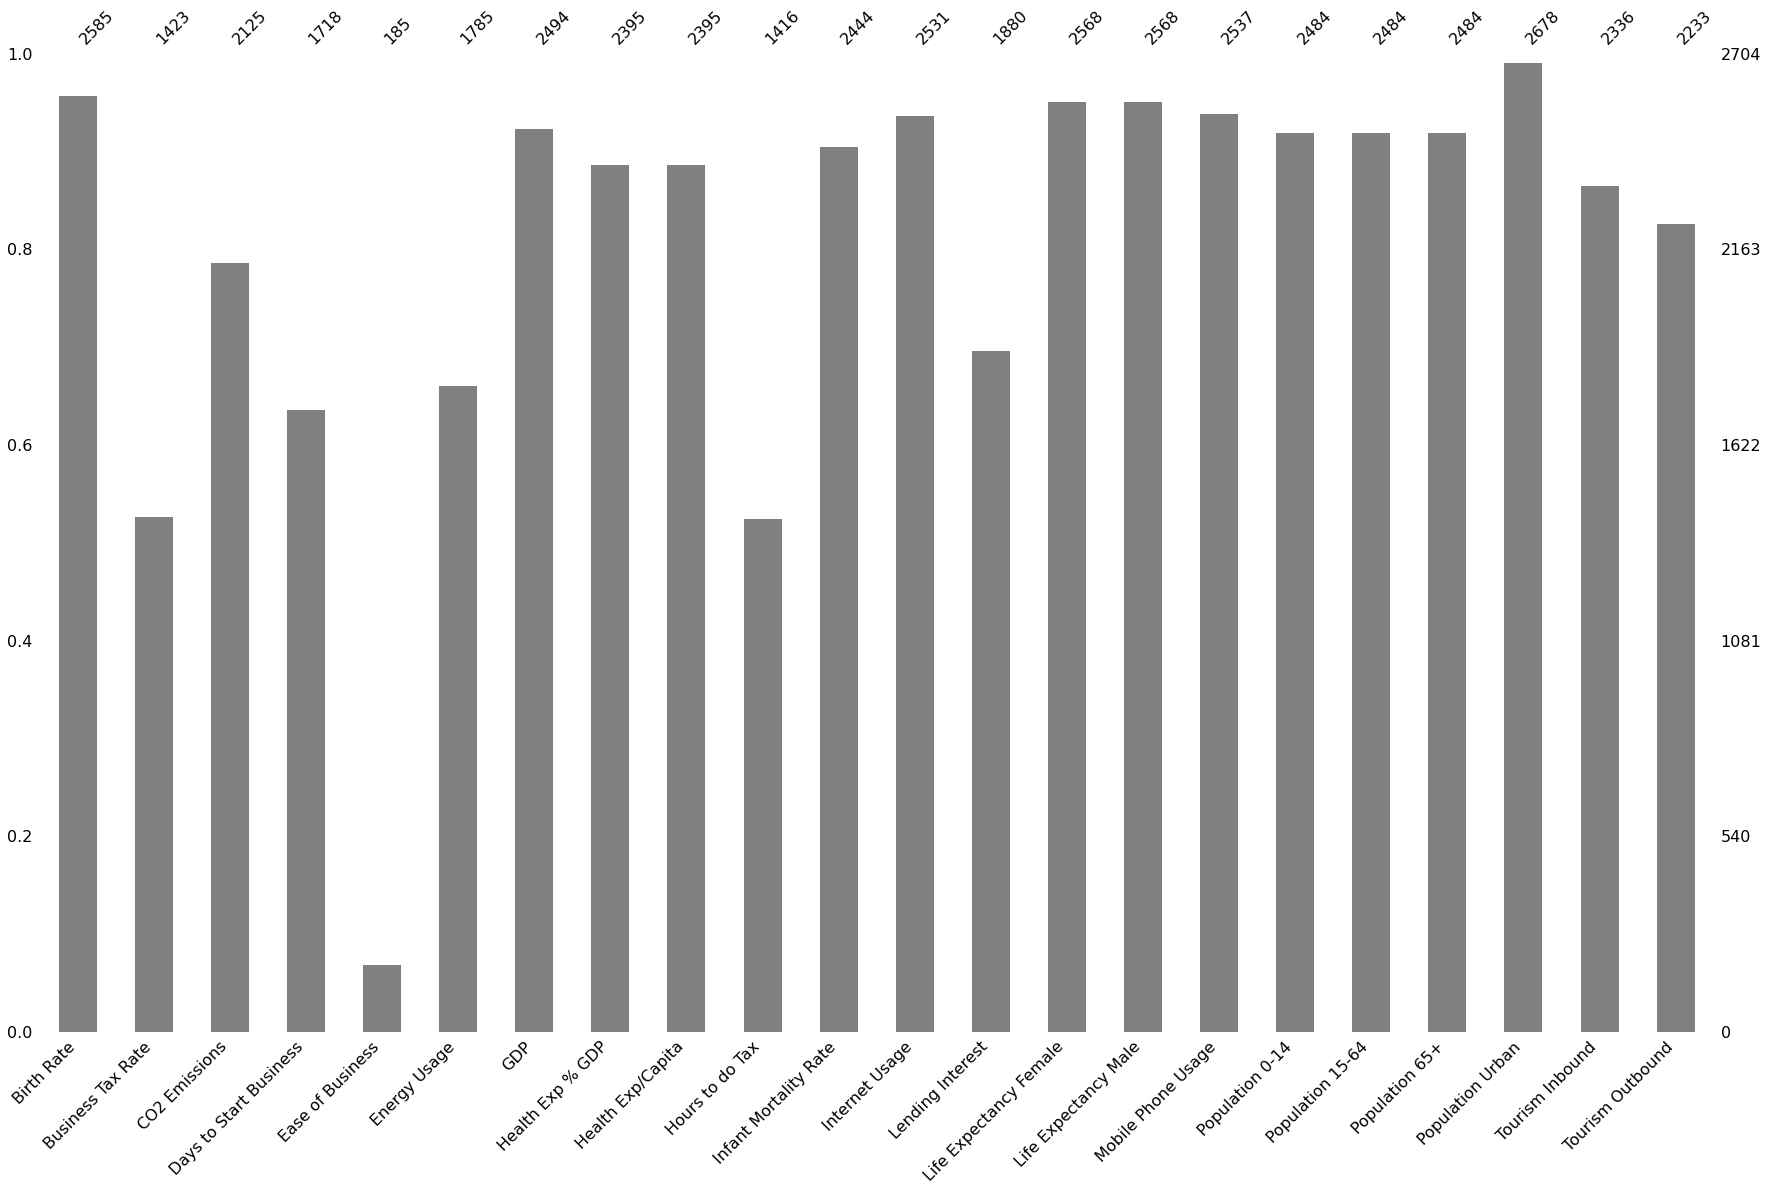

In [14]:
msno.bar(df[missing_df], labels=True, color="grey", log=False, figsize=(30,18))

Based on the observed graphs, we cannot really throw away any rows with NaNs - this would mean we lose a lot of data.
This dataset is partially filled, and in order to salvage whatever we have it's better to keep NaNs.  

# Column Types

At first, let's see what column types do we have:

In [20]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Year
0,2.00%,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",3.50%,$60,...,1,34.20%,61.90%,3.90%,31719449,59.90%,Africa,"$102,000,000","$193,000,000",1/12/2000
1,5.00%,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",3.40%,$22,...,1,47.60%,49.90%,2.50%,13924930,32.40%,Africa,"$34,000,000","$146,000,000",1/12/2000
2,4.30%,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",4.30%,$15,...,1,45.40%,51.70%,2.90%,6949366,38.30%,Africa,"$77,000,000","$50,000,000",1/12/2000
3,2.70%,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",4.70%,$152,...,1,38.30%,58.70%,2.90%,1755375,53.20%,Africa,"$227,000,000","$209,000,000",1/12/2000
4,4.60%,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",5.10%,$12,...,1,46.80%,50.50%,2.80%,11607944,17.80%,Africa,"$23,000,000","$30,000,000",1/12/2000


In [15]:
df.dtypes

Birth Rate                 object
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP           object
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate      object
Internet Usage            float64
Lending Interest           object
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14            object
Population 15-64           object
Population 65+             object
Population Total            int64
Population Urban           object
Region                     object
Tourism Inbound            object
Tourism Outbound           object
Year                       object
dtype: object

So, numerical columns supposed to be:
- Birth Rate
- Business Tax Rate
- GDP
- Health Exp % GDP
- Health Exp/Capita
- Infant Mortality Rate
- Lending Interest
- Everything in Population
- Tourism inbound/outbound

Additionally, 'Year' is a datetime column

In [42]:
# Collecting all the columns containing the % sign
percentages = [
    'Birth Rate', 'Business Tax Rate', 'Health Exp % GDP',
    'Infant Mortality Rate', 'Lending Interest', 'Population 0-14',
    'Population 15-64', 'Population 65+', 'Population Urban'
]



# defining the function to clean all the percentages:
def clean_percentages(value):
        value = value.strip(" ")
        value = value.strip("%")
        return value


# Applying this function to columns:
for col in percentages:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: clean_percentages(x))
    df[col] = df[col].astype(float)
    
# Columns with dollar signs and commas:    
amounts = ['GDP', 'Tourism Inbound', 'Tourism Outbound', 'Health Exp/Capita']    

# Defining the function to clean them:
def clean_amounts(value):
    value = value.strip(" ")
    value = value.replace("$", "")
    value = value.replace(",", "")
    return value

for col in amounts:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: clean_amounts(x))
    df[col] = df[col].astype(float)
    
df['Year'] = df['Year'].astype(np.datetime64)


In [43]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Region,Tourism Inbound,Tourism Outbound,Year
0,2.0,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,3.5,60.0,...,1,34.2,61.9,3.9,31719449,59.9,Africa,102000000.0,193000000.0,2000-01-12
1,5.0,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,3.4,22.0,...,1,47.6,49.9,2.5,13924930,32.4,Africa,34000000.0,146000000.0,2000-01-12
2,4.3,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,4.3,15.0,...,1,45.4,51.7,2.9,6949366,38.3,Africa,77000000.0,50000000.0,2000-01-12
3,2.7,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,4.7,152.0,...,1,38.3,58.7,2.9,1755375,53.2,Africa,227000000.0,209000000.0,2000-01-12
4,4.6,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,5.1,12.0,...,1,46.8,50.5,2.8,11607944,17.8,Africa,23000000.0,30000000.0,2000-01-12


At this point, the dataset is clean. Even though the calculations have to be made with regards of NaNs, all the unwanted signs are removed, and fields can be used as numerical.

# Exporting the .csv